### Stacking

In stacking initially, you train multiple base models of different type on training/test dataset. It is ideal to mix models that work differently (kNN, bagging, boosting etc) so that it can learn some part of the problem. At level one, use the predicted values from base models as features and train a model which is known as meta-model thus combining the learning of individual model will result in improved accuracy. This is a simple level 1 stacking, and similarly you can stack multiple levels of different type of models.  

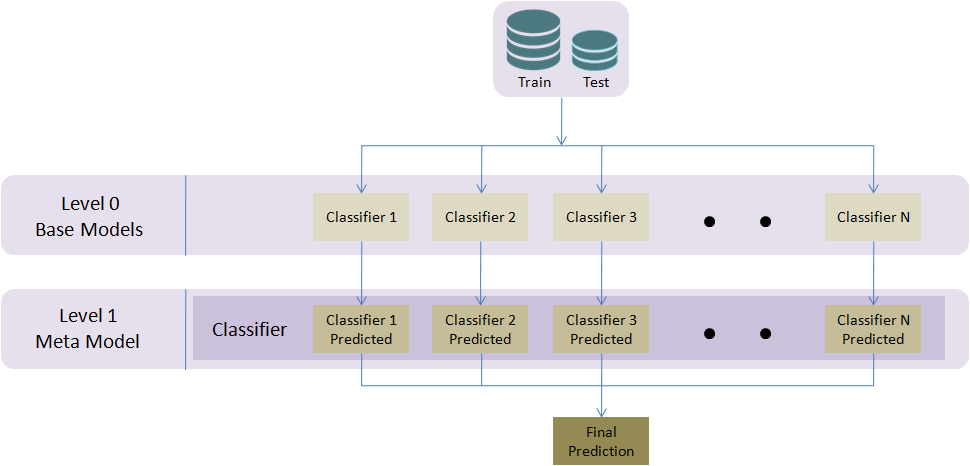

In [1]:
from IPython.display import Image
Image(filename='../Chapter 4 Figures/Stacking.png', width=700)

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2017)  # seed to shuffle the train set

# read the data in
df = pd.read_csv("Data/Diabetes.csv")

X = df.ix[:,0:8] # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=2017)
num_trees = 10
verbose = True # to print the progress

clfs = [KNeighborsClassifier(),
        RandomForestClassifier(n_estimators=num_trees, random_state=2017),
        GradientBoostingClassifier(n_estimators=num_trees, random_state=2017)]

# Creating train and test sets for blending
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

print('5-fold cross validation:\n')
for i, clf in enumerate(clfs):   
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    print("##### Base Model %0.0f #####" % i)
    print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    clf.fit(X_train, y_train)   
    print("Train Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_train), y_train)))
    dataset_blend_train[:,i] = clf.predict_proba(X_train)[:, 1]
    dataset_blend_test[:,i] = clf.predict_proba(X_test)[:, 1]
    print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))    

print "##### Meta Model #####"
clf = LogisticRegression()
scores = cross_validation.cross_val_score(clf, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
clf.fit(dataset_blend_train, y_train)
print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Train Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_train), y_train)))
print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_test), y_test))) 

C:\Users\Manoh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


5-fold cross validation:

##### Base Model 0 #####
Train CV Accuracy: 0.72 (+/- 0.03)
Train Accuracy: 0.82 
Test Accuracy: 0.78 
##### Base Model 1 #####
Train CV Accuracy: 0.70 (+/- 0.05)
Train Accuracy: 0.98 
Test Accuracy: 0.81 
##### Base Model 2 #####
Train CV Accuracy: 0.75 (+/- 0.02)
Train Accuracy: 0.79 
Test Accuracy: 0.82 
##### Meta Model #####
Train CV Accuracy: 0.98 (+/- 0.02)
Train Accuracy: 0.98 
Test Accuracy: 0.81 
